In [147]:
import numpy as np
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Table: covid_19_data.csv

In [273]:
datos = pd.read_csv('Fuentes\\covid_19_data.csv')
datos.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [274]:
datos.describe()

,SNo,Confirmed,Deaths,Recovered
count,6722.000000,6722.000000,6722.000000,6722.000000
mean,3361.500000,601.195924,19.855846,226.341267
std,1940.618587,4896.332140,204.486922,2556.035202
min,1.000000,0.000000,0.000000,0.000000
25%,1681.250000,2.000000,0.000000,0.000000
50%,3361.500000,13.000000,0.000000,0.000000
75%,5041.750000,108.000000,1.000000,11.000000
max,6722.000000,67800.000000,3122.000000,56927.000000


### ObservationDate

We convert the **"ObservationDate"** column into a date object with the library datetime.

In [275]:
# first, we convert from string to datetime every dat in our column "ObservationDate"
dates_list = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datos['ObservationDate']]
# We assign the converted dates to our column.
datos['ObservationDate'] = dates_list
# Ensure df['date'] is a Series with dtype datetime64[ns].
datos['ObservationDate']=pd.to_datetime(datos['ObservationDate'])
datos.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


We can see that in this table: 
- We have information from the 22th January 2020 to the 18th March of 2020.
- The total count of days that we have registered is: 55


In [276]:
print("Initial Date: ",datos['ObservationDate'].min())
print("Final Date: ",datos['ObservationDate'].max())
print("Total count of days registered: ",datos['ObservationDate'].nunique())

Initial Date:  2020-01-22 00:00:00
Final Date:  2020-03-18 00:00:00
Total count of days registered:  57


Also we have that the dates with more records are the following:

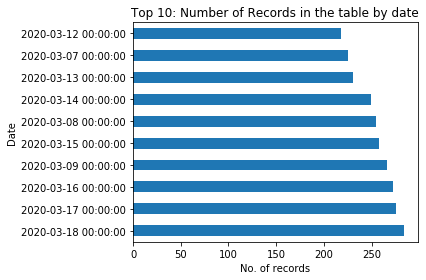

In [277]:
datos['ObservationDate'].value_counts()[:10].plot(kind='barh')
plt.xlabel('No. of records')
plt.ylabel('Date')
plt.title('Top 10: Number of Records in the table by date')
plt.tight_layout()

### Province/State

We Have **271 unique values** in this column

In [279]:
datos['Province/State'].nunique()

276

We have 2,462 NA's in this column

In [280]:
sum(datos['Province/State'].isna())

2766

That NA's correspond to 165 countries of the 171 total countries that we have on the "Country/Region" column. Below we display a list of that countries:

In [281]:
print("Total unique countries in the table: ",datos['Country/Region'].nunique())
print("Number of unique countries that don't have province info: ", 
      datos[datos['Province/State'].isna()]['Country/Region'].nunique())

Total unique countries in the table:  179
Number of unique countries that don't have province info:  173


Countries that doesn't have province or state information:

In [282]:
print(datos[datos['Province/State'].isna()]['Country/Region'].unique())

['Japan' 'Thailand' 'South Korea' 'Singapore' 'Philippines' 'Malaysia'
 'Vietnam' 'Australia' 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal'
 'Cambodia' 'Sri Lanka' 'Ivory Coast' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Germany' 'Spain' 'Belgium'
 'Egypt' 'Iran' 'Lebanon' 'Oman' 'Afghanistan' 'Bahrain' 'Iraq' 'Kuwait'
 'Algeria' 'Croatia' 'Switzerland' 'Austria' 'Israel' 'Pakistan' 'Georgia'
 'Greece' 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia'
 'Netherlands' 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania'
 'New Zealand' 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco'
 'Qatar' 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia'
 'Dominican Republic' 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco'
 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine'
 'Saint Barthelemy' 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein'
 'Poland' 'Tunisia' 'Palestine' 'Bosnia and Herzegovina' 'Slovenia'
 'South Africa' 'Bh

In [283]:
datos[datos['Province/State'].notna()]['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Canada',
       'Australia', 'Germany', 'Others', 'Israel', 'Lebanon', 'Iraq',
       'Austria', 'France', 'UK', 'Denmark', 'Netherlands'], dtype=object)

In [284]:
datos['Province/State'].nunique()

276

# Mortality Rate

We compute the mortality rates dividing the Deaths by the Confirmed cases

In [285]:
# Computation
datos['MortalityRate'] = datos['Deaths']/datos['Confirmed']

In [305]:
datos[datos['Country/Region']=="Mexico"]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,MortalityRate
81,82,2020-01-23,NaN,Mexico,1/23/20 17:00,0.0,0.0,0.0,NaN
2679,2680,2020-02-28,NaN,Mexico,2020-02-28T15:03:26,1.0,0.0,0.0,0.0
2766,2767,2020-02-29,NaN,Mexico,2020-02-29T21:13:17,4.0,0.0,0.0,0.0
2887,2888,2020-03-01,NaN,Mexico,2020-03-01T23:33:03,5.0,0.0,0.0,0.0
3017,3018,2020-03-02,NaN,Mexico,2020-03-01T23:33:03,5.0,0.0,0.0,0.0
3163,3164,2020-03-03,NaN,Mexico,2020-03-03T10:03:04,5.0,0.0,1.0,0.0
3319,3320,2020-03-04,NaN,Mexico,2020-03-03T10:03:04,5.0,0.0,1.0,0.0
3482,3483,2020-03-05,NaN,Mexico,2020-03-03T10:03:04,5.0,0.0,1.0,0.0
3662,3663,2020-03-06,NaN,Mexico,2020-03-06T16:43:04,6.0,0.0,1.0,0.0
3864,3865,2020-03-07,NaN,Mexico,2020-03-06T16:43:04,6.0,0.0,1.0,0.0


# Time Series
Here we display the time series of the confirmed cases of COVID-19 per country.

In [333]:
time_series_confirmed = datos.pivot_table(values='Confirmed', index='Country/Region', columns='ObservationDate',
                  aggfunc='sum')
time_series_confirmed.head()

ObservationDate,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18
Country/Region,,,,,,,,,,,,,,,,,,,,,
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"('St. Martin',)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,5.0,7.0,7.0,7.0,11.0,16.0,21.0,22.0,22.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,10.0,12.0,23.0,33.0,38.0,42.0,51.0,55.0,59.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,20.0,20.0,24.0,26.0,37.0,48.0,54.0,60.0,74.0


### United States

In [350]:
US_timeserie = make_timeserie('US')
US_timeserie.describe()

,US,diff,diff%
count,57.000000,56.000000,56.000000
mean,603.701754,139.017857,0.202796
std,1542.945629,352.967652,0.309541
min,1.000000,0.000000,0.000000
25%,12.000000,0.000000,0.000000
50%,15.000000,1.000000,0.088312
75%,153.000000,37.500000,0.301224
max,7786.000000,1789.000000,1.500000


Text(0.5, 1.0, 'Confirmed Cases United States')

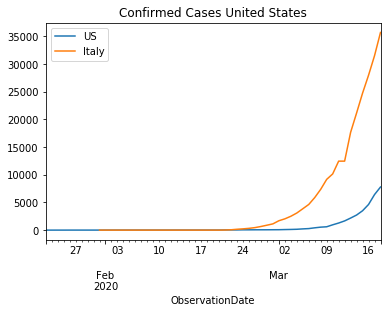

In [355]:
US_timeserie.plot(y='US')
time_series_confirmed.loc['Italy'].plot(legend='Italy')
plt.title('Confirmed Cases United States')

In [352]:
# Top 5 Increments of confirmed cases in cuantity
US_timeserie.sort_values(by='diff',ascending=False).head()

,US,diff,diff%
ObservationDate,,,
2020-03-17,6421.0,1789.0,0.386226
2020-03-18,7786.0,1365.0,0.212584
2020-03-16,4632.0,1133.0,0.323807
2020-03-15,3499.0,773.0,0.283566
2020-03-14,2726.0,547.0,0.251033


In [353]:
# Top 5 Increments of confirmed cases in %
US_timeserie.sort_values(by='diff%',ascending=False).head()

,US,diff,diff%
ObservationDate,,,
2020-01-26,5.0,3.0,1.500000
2020-02-21,35.0,20.0,1.333333
2020-01-24,2.0,1.0,1.000000
2020-03-10,959.0,354.0,0.585124
2020-02-24,53.0,18.0,0.514286


### Mexico

In [374]:
Mexico_timeserie = make_timeserie('Mexico')
Mexico_timeserie.sort_values(by='Mexico',ascending=False).head(10)

,Mexico,diff,diff%
ObservationDate,,,
2020-03-18,93.0,11.0,0.134146
2020-03-17,82.0,29.0,0.547170
2020-03-16,53.0,12.0,0.292683
2020-03-15,41.0,15.0,0.576923
2020-03-14,26.0,14.0,1.166667
2020-03-13,12.0,0.0,0.000000
2020-03-12,12.0,4.0,0.500000
2020-03-11,8.0,1.0,0.142857
2020-03-09,7.0,0.0,0.000000


In [366]:
Mexico_timeserie.describe()

,Mexico,diff,diff%
count,21.000000,19.000000,19.000000
mean,18.571429,4.842105,0.367216
std,26.466151,7.854674,0.704572
min,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,7.000000,1.000000,0.142857
75%,12.000000,7.500000,0.396341
max,93.000000,29.000000,3.000000


In [363]:
Mexico_timeserie.sort_values('diff',ascending=False).head()

,Mexico,diff,diff%
ObservationDate,,,
2020-03-17,82.0,29.0,0.547170
2020-03-15,41.0,15.0,0.576923
2020-03-14,26.0,14.0,1.166667
2020-03-16,53.0,12.0,0.292683
2020-03-18,93.0,11.0,0.134146


In [370]:
Mexico_timeserie.sort_values('diff%',ascending=False).head()

,Mexico,diff,diff%
ObservationDate,,,
2020-02-29,4.0,3.0,3.000000
2020-03-14,26.0,14.0,1.166667
2020-03-15,41.0,15.0,0.576923
2020-03-17,82.0,29.0,0.547170
2020-03-12,12.0,4.0,0.500000


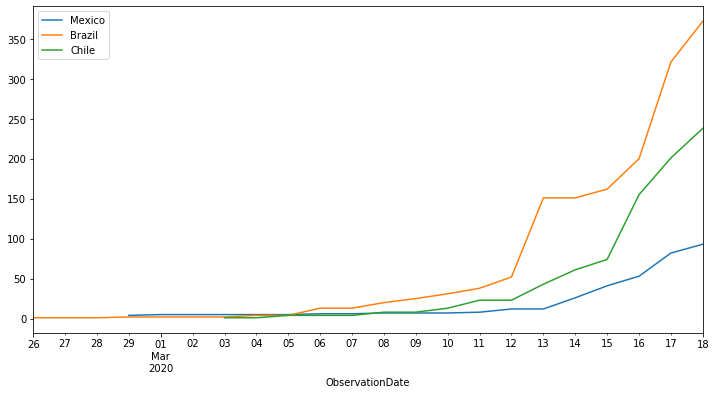

In [385]:
Mexico_timeserie.dropna().plot(y='Mexico', figsize=(12,6))
time_series_confirmed.loc['Brazil'].dropna().plot(legend='Brazil')
time_series_confirmed.loc['Chile'].dropna().plot(legend='Chile')

In [386]:
Brazil_timeserie = make_timeserie('Brazil')
Brazil_timeserie.describe()

,Brazil,diff,diff%
count,22.000000,21.000000,21.000000
mean,71.272727,17.666667,0.421325
std,108.680038,33.537044,0.632759
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,16.500000,5.000000,0.225806
75%,126.250000,11.000000,0.538462
max,372.000000,121.000000,2.250000


In [387]:
Chile_timeserie = make_timeserie('Chile')
Chile_timeserie.describe()

,Chile,diff,diff%
count,16.000000,15.000000,15.000000
mean,53.812500,15.800000,0.564731
std,76.240163,22.904148,0.778984
min,1.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,18.000000,5.000000,0.296774
75%,64.250000,19.000000,0.819398
max,238.000000,81.000000,3.000000


In [392]:
Italy_timeserie = make_timeserie('Italy')
Italy_timeserie.sort_values('Italy',ascending=False).head(10)

,Italy,diff,diff%
ObservationDate,,,
2020-03-18,35713.0,4207.0,0.133530
2020-03-17,31506.0,3526.0,0.126019
2020-03-16,27980.0,3233.0,0.130642
2020-03-15,24747.0,3590.0,0.169684
2020-03-14,21157.0,3497.0,0.198018
2020-03-13,17660.0,5198.0,0.417108
2020-03-12,12462.0,0.0,0.000000
2020-03-11,12462.0,2313.0,0.227904
2020-03-10,10149.0,977.0,0.106520


In [396]:
China_timeserie = make_timeserie('Mainland China')
China_timeserie.sort_values('Mainland China',ascending=False)

,Mainland China,diff,diff%
ObservationDate,,,
2020-03-18,80906.0,22.0,0.000272
2020-03-17,80884.0,17.0,0.000210
2020-03-16,80867.0,19.0,0.000235
2020-03-15,80848.0,21.0,0.000260
2020-03-14,80827.0,26.0,0.000322
2020-03-13,80801.0,8.0,0.000099
2020-03-12,80793.0,8.0,0.000099
2020-03-11,80785.0,28.0,0.000347
2020-03-10,80757.0,22.0,0.000272


### Texas

In [312]:
datos[datos['Province/State']=='Texas']

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,MortalityRate
4613,4614,2020-03-10,Texas,US,2020-03-10T04:13:13,13.0,0.0,0.0,0.000000
4810,4811,2020-03-11,Texas,US,2020-03-11T22:53:03,21.0,0.0,0.0,0.000000
5023,5024,2020-03-12,Texas,US,2020-03-12T23:44:33,27.0,0.0,0.0,0.000000
5367,5368,2020-03-13,Texas,US,2020-03-11T20:00:00,43.0,0.0,0.0,0.000000
5471,5472,2020-03-14,Texas,US,2020-03-14T22:33:03,57.0,0.0,0.0,0.000000
5719,5720,2020-03-15,Texas,US,2020-03-15T18:20:19,72.0,0.0,0.0,0.000000
5977,5978,2020-03-16,Texas,US,2020-03-16T23:53:03,85.0,0.0,0.0,0.000000
6247,6248,2020-03-17,Texas,US,2020-03-17T20:13:22,110.0,1.0,0.0,0.009091
6509,6510,2020-03-18,Texas,US,2020-03-18T19:53:03,173.0,3.0,0.0,0.017341


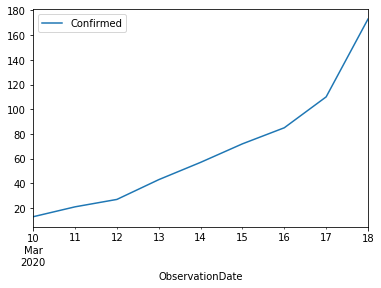

In [313]:
datos[datos['Province/State']=='Texas'].plot(x='ObservationDate',y='Confirmed')

# Functions

In [318]:
def diff_percentage(series):
    dif = [np.nan]
    for i in range(1,len(series)):
        dif.append(series[i]/series[i-1]-1)
    return(dif)

In [349]:
def make_timeserie(country):
    """
    Function that returns a df of given country as a parameter
    """
    timeserie = time_series_confirmed.loc[country]
    timeserie = pd.DataFrame(timeserie)
    timeserie['diff'] = timeserie[country].diff(1)
    timeserie['diff%'] = diff_proc(timeserie[country])
    return(timeserie)